In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='intro'></a>
## Introduction
> In this project, a dataset of appointemnt record in hospitals is investigated. The reason why patient did not show up attracts our attention. This data set contains records whether patients missed appointments, attributes of patients and information about patients. The data set is provided on kaggle. 
> Given the information and attributes of patient and his/her scheduled appointment, how likely is he/she to show up to the appointment as scheduled? 

In [2]:
# Loading data
df=pd.read_csv('ns.csv')


In [3]:
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Rows and columns
df.shape

(110527, 14)

In [5]:
# Statistics of dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='wrangling'></a>
## Data Wrangling

In [6]:
# checked the details of data sets for data cleaning process
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [7]:
# removed unncessary columns
df.drop(['AppointmentID', 'PatientId', 'ScheduledDay', 'AppointmentDay' ], axis=1, inplace= True)

In [8]:
# Correction of names of columns
df = df.rename(columns={'No-show': 'status'})
df = df.rename(columns={'Hipertension': 'Hypertension'})
df = df.rename(columns={'Handcap': 'Handicap'})

In [9]:
# Data is filtered by age.
m=df[(df.Age >= 18) & (df.Age<=100)]

In [10]:
# column names are changed into lower case letters
m.columns = [x.lower() for x in m.columns]

In [11]:
m.head()

,gender,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,status
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,F,76,REPÚBLICA,0,1,0,0,0,0,No


In [12]:
# Boolean values of status columns are changed into '0' and '1'
m.status[m.status == 'No'] = 0
m.status[m.status == 'Yes'] = 1

c:\users\bushi\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\bushi\appdata\local\programs\python\python36-32\lib\site-packages\pandas\core\generic.py:7620: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
c:\users\bushi\appdata\local\programs\python\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  ex

<a id='eda'></a>
## Exploratory Data Analysis



In [13]:
show=m.status==True
nshow=m.status==False

### Question 1:Does the Hypertenstion History of patients affect the likelihood of no-show appointments?
> Histograms shows that Hypertension is more in the patients who did not show up for appointmeents. For no show up appointments are near to 20000 patients and for show its less than 10000 patients 

In [14]:
m.hypertension[show].mean()

0.23034499662969546

In [15]:
m.hypertension[nshow].mean()

0.2694212897143114

Text(0.5,1,'Histogram')

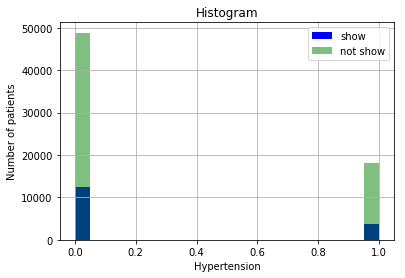

In [16]:
m.hypertension[show].hist(alpha=1, bins=20, facecolor='b', label='show')
m.hypertension[nshow].hist(alpha=0.5, bins=20, facecolor='g', label='not show')
plt.legend();
plt.xlabel('Hypertension')
plt.ylabel('Number of patients')
plt.title('Histogram')

### Question 2: Are no-show appointments associated with a certain gender?
> The bar char shows that female patients have high rate of no-show up for appointments. More than 40000 female patients have no-show status

Text(0.5,1,'Bar chart')

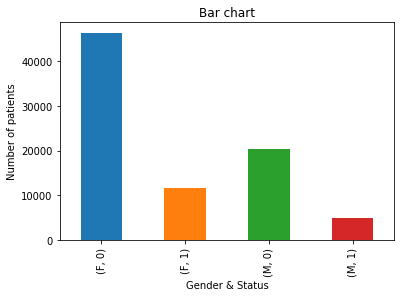

In [26]:
m.groupby('gender')['status'].value_counts().plot(kind='bar')
plt.xlabel('Gender & Status')
plt.ylabel('Number of patients')
plt.title('Bar chart')


### Quetion 3: Are no-show appointments and Hypertension associated with a certain gender?
> The bar chart shows that mostly patients who did not show up are female and have hypertension history. More than 40000 females are diagnosed with hypertension and no show status

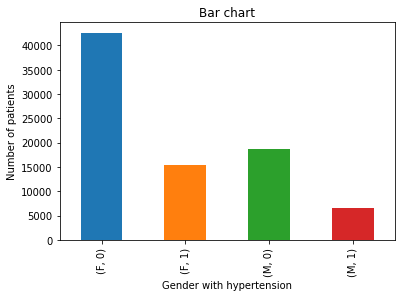

In [27]:
m.groupby('gender')['hypertension'].value_counts().plot(kind='bar')
plt.xlabel('Gender with hypertension')
plt.ylabel('Number of patients')
plt.title('Bar chart')
plt.show()

### Question 4: Does the Age of the patients affect the likelihood of no-show appointments?
> The histogram shows that no-show up rate is more for the patients between age 20 and 60

Text(0.5,1,'Histogram')

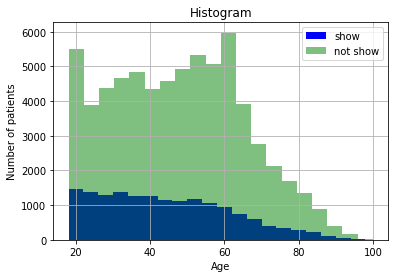

In [19]:
m.age[show].hist(alpha=1, bins=20, facecolor='b', label='show')
m.age[nshow].hist(alpha=0.5, bins=20, facecolor='g', label='not show')
plt.legend();
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Histogram')

<a id='conclusions'></a>
## Conclusions
> Our analysis make following conclusion:
    -  Hypertension has significant affect on no-show up appointments.
    -  Mostly suffered patients from Hypertension aer females
    -  No-show up decreased after the age of 60. Factors need to be further investigated.
> Limitations:Our data has following limitations:
    -  There is no detail about time duration about sms sent to patient
    -  Most of our data is categorical